In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Gamblers_Problem():
  def __init__(self,Head_Probability,Discount_Factor = 1,theta = 0.000001):
    self.Discount_Factor = Discount_Factor
    self.theta = theta
    self.Head_Probability = Head_Probability

    self.S = np.arange(101)
    self.Values = np.zeros(101)
    self.policy = np.zeros(100)

  def available_actions(self,state):
    return np.arange(1,min(state,100-state)+1)
  
  def calculate_reward(self,state,action):
    return int(state+action == 100)

  def max_value(self,state,values):
    action_values = np.zeros(101)
    rewards = np.zeros(101)
    rewards[100] = 1 
    for action in self.available_actions(state):
      action_values[action] = self.Head_Probability * (self.calculate_reward(state,action) + self.Discount_Factor * values[state+action]) + (1-self.Head_Probability)*(self.Discount_Factor * values[state-action])
    
    max_value = np.max(action_values)
    argmax_value = np.argmax(action_values)
    return max_value,argmax_value

  def value_iteration(self):

    while(True):
      delta = 0
      for state in range(1,100):
        best_value,_ = self.max_value(state,self.Values)
        delta = max(delta,abs(best_value - self.Values[state]))
        self.Values[state] = best_value
      if(delta<self.theta): break
    for state in range(1,100):
        _,self.policy[state] = self.max_value(state,self.Values)
    

## Ph = 0.55

In [ ]:
g = Gamblers_Problem(0.55)

In [ ]:
g.value_iteration()

In [ ]:
print("optimal policy for P_h=0.55: ")
print(g.policy)

optimal policy for P_h=0.55: 
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [ ]:
g.Values

array([0.        , 0.18179384, 0.33053471, 0.45223242, 0.55180402,
       0.63327253, 0.6999295 , 0.75446798, 0.79909135, 0.83560237,
       0.86547602, 0.88991908, 0.9099189 , 0.92628333, 0.93967331,
       0.95062962, 0.95959471, 0.96693057, 0.9729334 , 0.97784552,
       0.98186521, 0.98515468, 0.98784666, 0.99004975, 0.99185281,
       0.99332852, 0.99453639, 0.99552506, 0.99633437, 0.9969969 ,
       0.99753931, 0.99798341, 0.99834706, 0.99864485, 0.99888875,
       0.99908852, 0.99925219, 0.99938628, 0.99949617, 0.99958624,
       0.99966008, 0.99972062, 0.99977028, 0.99981103, 0.99984446,
       0.99987191, 0.99989445, 0.99991297, 0.99992819, 0.99994071,
       0.999951  , 0.99995948, 0.99996646, 0.99997221, 0.99997696,
       0.99998087, 0.99998411, 0.99998678, 0.99998899, 0.99999083,
       0.99999234, 0.9999936 , 0.99999465, 0.99999552, 0.99999625,
       0.99999685, 0.99999735, 0.99999778, 0.99999813, 0.99999842,
       0.99999867, 0.99999888, 0.99999905, 0.9999992 , 0.99999

Text(0.5, 0, 'capital')

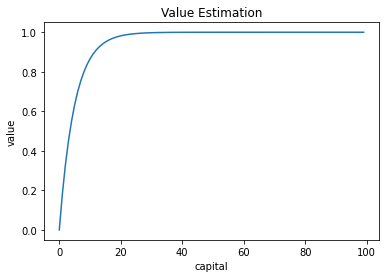

In [ ]:
plt.plot(range(100),g.Values[:100])
plt.title("Value Estimation")
plt.ylabel("value")
plt.xlabel("capital")

Text(0, 0.5, 'optimal bet')

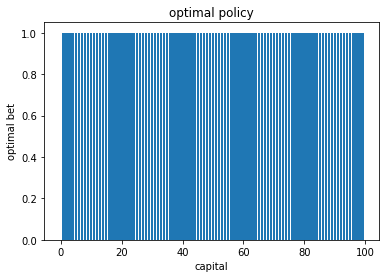

In [ ]:
plt.bar(range(100),g.policy,align='center', alpha=1)
plt.title("optimal policy")
plt.xlabel("capital")
plt.ylabel("optimal bet")

## Ph = 0.25

In [ ]:
g25 = Gamblers_Problem(0.25)

In [ ]:
g25.value_iteration()

In [ ]:
print("optimal policy for P_h=0.25: ")
print(g25.policy)

optimal policy for P_h=0.25: 
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 10.  9. 17.
 18. 19.  5. 21. 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


In [ ]:
g25.Values

array([0.00000000e+00, 7.28459563e-05, 2.91426259e-04, 6.95257448e-04,
       1.16577863e-03, 1.77125235e-03, 2.78105366e-03, 4.03661077e-03,
       4.66311452e-03, 5.60140889e-03, 7.08500942e-03, 9.04085029e-03,
       1.11242325e-02, 1.56796345e-02, 1.61464431e-02, 1.69534393e-02,
       1.86524581e-02, 1.98260567e-02, 2.24056377e-02, 2.73847259e-02,
       2.83400794e-02, 3.04945425e-02, 3.61635444e-02, 3.84959069e-02,
       4.44969302e-02, 6.25000000e-02, 6.27185697e-02, 6.33743340e-02,
       6.45857902e-02, 6.59973359e-02, 6.78137571e-02, 7.08431744e-02,
       7.46098323e-02, 7.64893436e-02, 7.93042283e-02, 8.37550596e-02,
       8.96226583e-02, 9.58726976e-02, 1.09538927e-01, 1.10939343e-01,
       1.13360318e-01, 1.18457374e-01, 1.21978171e-01, 1.29716994e-01,
       1.44654195e-01, 1.47520238e-01, 1.53983628e-01, 1.70990647e-01,
       1.77987721e-01, 1.95990791e-01, 2.50000000e-01, 2.50218570e-01,
       2.50874334e-01, 2.52085790e-01, 2.53497336e-01, 2.55313757e-01,
      

Text(0.5, 0, 'capital')

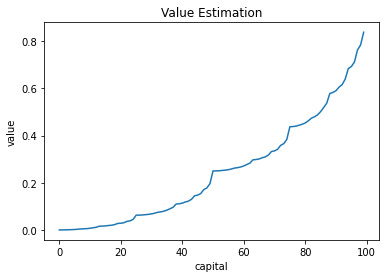

In [ ]:
plt.plot(range(100),g25.Values[:100])
plt.title("Value Estimation")
plt.ylabel("value")
plt.xlabel("capital")

Text(0, 0.5, 'optimal bet')

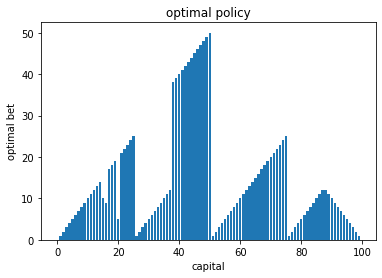

In [ ]:
plt.bar(range(100),g25.policy,align='center', alpha=1)
plt.title("optimal policy")
plt.xlabel("capital")
plt.ylabel("optimal bet")